<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center><font color=#555555><font size=6> Ingeniería Financiera </font> <br> <br>

<center><font color=#555555><font size=5> ITE1731 - Microestructura y Sistemas de Trading </font> <br> <br> <br>

<center><font color=#555555><font size=5> I.F. Andres Piedras Ayala </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> Febrero 2021 </a> | <font color= #555555> <font size = 4> Repositorio: <a href='https://github.com/PiedrasAyala95/MyST_LAB1_APA'>Link</a></font>

<br>

---

<br>

<br>

<center> <font color= #555555> <font size = 7> Laboratorio 1 </font> <br> <br> <font color= #555555> <font size = 5> Inversión del Capital </font>

<br>

# <font color= #6B6B6B> <font size = 6> 0. Librerías y Dependencias </font>

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B> <font size = 5> 0.1 Librerías </font> <font color= #555555>

Para correr este notebook es necesario tener instaladas y/o en el archivo _requirements.txt_ las siguientes librerías :

- pandas>=1.1.1 
- numpy>=1.19.1
- jupyter>=1.0.0
- yfinance>=0.1.55
- matplotlib.pyplot>=3.3.3

- Pandas es una biblioteca de software escrita para manipulación y análisis de datos para el lenguaje de programación Python. En particular, ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales.
- NumPy es una extensión de Python, que le agrega mayor soporte para vectores y matrices, constituyendo una biblioteca de funciones matemáticas de alto nivel para operar con esos vectores o matrices
- Jupyter es una organizacion creada para desarrollar software de código abierto, estándares abiertos y servicios para computación interactiva en docenas de lenguajes de programación
- Yfinance tiene como objetivo resolver este problema ofreciendo una forma fiable, con subprocesos y pitónica de descargar datos históricos del mercado de Yahoo! Finanzas.
- Matplotlib.pyplot es una colección de funciones que hacen que matplotlib funcione como MATLAB. Cada pyplotfunción realiza algún cambio en una figura: por ejemplo, crea una figura, crea un área de trazado en una figura, traza algunas líneas en un área de trazado, decora la trama con etiquetas, etc.

# <font color= #6B6B6B> <font size = 5> 0.2 Dependencias </font> <font color= #555555>

Para correr este notebook es necesario contar con los siguientes archivos y dependencias externas:

- files/precios.csv : Precios históricos
- files/datos.txt : Otros datos históricos

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introducción </font>

<hr style="border:0.02in solid gray"> </hr>

Tenemos un Caso: Tienes 1 Millón de pesos, tienes dos opciones para invertirlos. Por un lado, puedes hacer una Inversión Pasiva del capital, comprando el 100% del capital de títulos de un ETF que replica al mercado de renta variable mexicano S&P/BMV IPC que es el NAFTRAC. Pero por otro lado, puedes hacer una Inversión Activa del capital, al crear un portafolio que tenga los mismos activos que el ETF y haciendo el rebalanceo por medio de un algoritmo en específico.

<br>

# <font color= #6B6B6B> <font size = 6> 2. Objetivos </font>

<hr style="border:0.02in solid gray"> </hr>

¿Qué estrategia de inversión propondrías si tu trabajo fuera administrar 1 Millón de pesos?

<br>

# <font color= #6B6B6B> <font size = 6> 3. Datos </font>

<hr style="border:0.02in solid gray"> </hr>

##### ---------------- Debemos primero mandar a llamar todos las funciones para que corra bien el codigo ----------------

In [1]:
from data import archivos, data_archivos
from functions import fecha1,Activos,yahoo,cierre,fecha2,p_adj_close,precios,Activo_No
from functions import passivo,peso,pasiva_2,dinero,operaciones,dataframe_pasiva,precios
from visualizations import grafico1,grafico2,grafico3,grafico4

In [2]:
archivos = archivos #Mandamos a llamar la lista de archivos
data_archivos = data_archivos #Mandamos a llamar un diccionario donde contenemos todo  los archivos limpios

In [3]:
archivos[:5] #Lista de archivos

['NAFTRAC_310118',
 'NAFTRAC_280218',
 'NAFTRAC_280318',
 'NAFTRAC_300418',
 'NAFTRAC_310518']

In [4]:
data_archivos['NAFTRAC_310118'].head() #Diccionario donde tenemos todos los archivos
                                        #Seleccionamos uno en especifico para poder visualizarlo (NAFTRAC_310118)

,Ticker,Nombre,Clase de activo,Peso (%),Precio,Acciones,Valor de mercado,Valor nominal,Sector,ISIN,Bolsa de valores,Ubicación,Moneda,Mercado de divisas,Tipo de Cambio
0,AMXL,AMERICA MOVIL L,Equity,0.1331,17.44,"309,663,816.00","5,400,536,951.04","5,400,536,951.04",Telecomunicaciones,MXP001691213,Bolsa Mexicana De Valores,México,MXN,MXN,1.00
1,FEMSAUBD,FOMENTO ECONOMICO MEXICANO,Equity,0.1269,181.52,"28,367,196.00","5,149,213,417.92","5,149,213,417.92",Productos básicos de consumo,MXP320321310,Bolsa Mexicana De Valores,México,MXN,MXN,1.00
2,GFNORTEO,GPO FINANCE BANORTE,Equity,0.0951,119.58,"32,280,468.00","3,860,098,363.44","3,860,098,363.44",Financieros,MXP370711014,Bolsa Mexicana De Valores,México,MXN,MXN,1.00
3,WALMEX,WALMART DE MEXICO V,Equity,0.0760,46.64,"66,171,336.00","3,086,231,111.04","3,086,231,111.04",Productos básicos de consumo,MX01WA000038,Bolsa Mexicana De Valores,México,MXN,MXN,1.00
4,GMEXICOB,GRUPO MEXICO B,Equity,0.0754,65.98,"46,355,364.00","3,058,526,916.72","3,058,526,916.72",Materiales,MXP370841019,Bolsa Mexicana De Valores,México,MXN,MXN,1.00


<br>

# <font color= #6B6B6B> <font size = 6> 4. Procesos </font>

<hr style="border:0.02in solid gray"> </hr>

##### -En esta parte se pondra en orden como se debe de llamar las funciones para que puedan correr correctamente, y de igual manera se explicara que se hace en cada linea de codigo

In [5]:
i_fechas = fecha1(archivos) #Mandamos a llamar una lista de fechas que la usaremos para otras funciones
global_tickers = Activos(archivos,data_archivos) #Manda a llamar todos los tickers unicos que tenemos en todos los archvios
Data_Yahoo = yahoo(global_tickers) #Manda a llamar una funcion donde descargamos los historicos de las acciones
Close = cierre(Data_Yahoo,global_tickers) #Manda a llamar una funcion donde contenemos unicamente el cierre de todas las acciones
Fechas_list = fecha2(Close,i_fechas) #Manda a llamar otra lista de fechas
Precio_Adj_Close = p_adj_close(Close,Fechas_list) #Manda a llamar una funcion donde contenemos unicamente el adj_close de todas las acciones
precios = precios(Precio_Adj_Close) #Manda a llamar una funcion donde contenemos unicamente el precio de todas las acciones
k = 1000000 #capital inicial
c = 0.00125 # comisiones por transaccion
List_Activos = Activo_No() # Manda a allmar una funcion donde tenemos una lista de activos que no queremos o necesitamos 
pasiva_p = passivo(k) #Mnada a llamr un diccionario 
Datos_Peso = peso(data_archivos,archivos,List_Activos) #Manda a llamar una funcion donde obtenemos los pesos % de cada activo
df_pasiva_Final = pasiva_2(Datos_Peso) #Manda a llamar una funcion donde nos ayudara a mantener los datos para futuras operacioenes
Dinero = dinero(df_pasiva_Final,precios,Fechas_list,k,c) #Nos regresa un numero 
df_operaciones = operaciones(df_pasiva_Final) #Mandamos a llamar un dataframe donde tenemos las columnas requeridas para las operaciones
df_pasiva = dataframe_pasiva(Fechas_list,precios,df_pasiva_Final,pasiva_p,Dinero,df_operaciones) #Mnadamos a llamar un dataframe donde contiene las operaciones de la pasiva

[*********************100%***********************]  39 of 39 completed


# <font color= #6B6B6B> <font size = 6> 5. Conclusiones </font>

<hr style="border:0.02in solid gray"> </hr>

##### -Inversión pasiva: Se trata de inversiones que replican un índice determinado. Los fondos indexados o cotizados nos permiten invertir nuestro dinero en base a una serie de valores, en lugar de tomar decisiones de forma continua, la inversión se limita a reportar los beneficios que obtiene el índice replicado.

##### -Inversión activa: En este caso realizamos una gestión propia de nuestros recursos, invirtiendo en acciones de nuestra elección, sin tratar de replicar un índice concreto.

In [6]:
df_pasiva.head()

,TIMESTAMP,CAPITAL,REND,REND_ACUM
0,31-01-2018,1000000.000000,0.000000,0.000000
1,2018-01-31,998805.459829,-0.001195,-0.001195
2,2018-02-28,943330.766258,-0.055541,-0.056736
3,2018-03-28,918905.642553,-0.025892,-0.082628
4,2018-04-30,961771.929086,0.046649,-0.035979


In [7]:
df_operaciones.head()

,TITULOS,PRECIO,COMISIONES,COMISIONES_ACUM,TIMESTAMP
0,129.0,135.050003,21.776813,21.776813,31-01-2018
1,1145.0,23.360001,33.434001,55.210814,2018-01-31
2,118.0,26.860001,3.961850,59.172664,2018-02-28
3,136.0,60.880001,10.349600,69.522264,2018-03-28
4,7622.0,17.440001,166.159605,235.681869,2018-04-30


##### - Mostramos una grafica donde podemos visualizar el comportamiento del rendimiento atraves del tiempo 

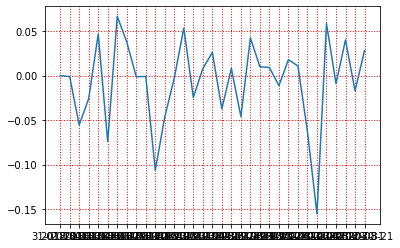

In [8]:
Plot1 = grafico1(df_pasiva) #Visauliza el comportamiento del rendimiento atraves del tiempo

##### - Mostramos una grafica donde podemos visualizar la cantidad de capital de cada activo

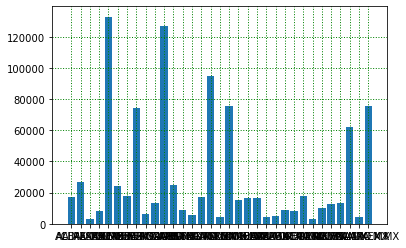

In [9]:
Plot4 = grafico4(df_pasiva_Final) #Visauliza la capital de cada tickers

##### - Mostramos una grafica donde podemos visualizar el comportamiento del rendimiento acumulado atraves del tiempo 

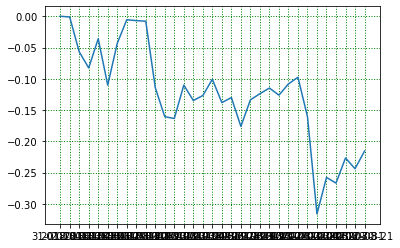

In [10]:
Plot3 = grafico3(df_pasiva) #Visauliza el comportamiento del rendimiento_acumulado atraves del tiempo